In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib as mpl

from colors import colors
from utils import expected_interaction_rate

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams.update({'font.size': 12})
len(colors)


8

In [2]:
# Fig Xa (data comparison 100V data from 0VeV measurement campaign w/ and w/o the lumi burst)
#

# data:
# energy:
# - HVeV at 100V w/ and w/o bursts


# Fig Xb

# get data

In [3]:
def random_power(a, b, c, size):
    r = np.random.random(size=size)
    return ( a ** c + ( b ** c - a ** c ) * r ) ** ( 1. / c )

In [4]:
#SuperCDMS info and instructions

# live-time is 164260 seconds => 1.9012 days
# detector mass is 0.93 grams.

# Bin edges are np.logspace(np.log10(10),np.log10(10e3),100)

# plotting instructions

#use `ax.step` with `where="post"`  and x values as `bins[1:]`

In [5]:
#Fig. (a)

In [6]:
data = {}
data['bins'] = np.logspace(np.log10(10),np.log10(10e3),100)
data['bw'] = data['bins'][1:] - data['bins'][:-1]  # bin width
data['bc'] = data['bins'][:-1] + data['bw'] / 2. # bin centers 
bwint = interpolate.interp1d(data['bins'][1:], data['bw'], kind='next') 
data['grid'] = np.logspace(np.log10(data['bins'][0]), np.log10(data['bins'][-1]), 10000)


# SuperCDMS 0VeV 100V burst 
expr = 'SCDMS_100V_burst'
data[expr] = {}
file = './data/spectra/SuperCDMS/0VeV/data_burst_ev.csv'

data[expr]['exposure'] = 0.00093 * 1.9012# kg * days (* eff)
data[expr]['recoils'] = np.loadtxt(file)[:]
data[expr]['recoils'] = data[expr]['recoils'][data[expr]['recoils'] > 0]  # Exclude negative values

data[expr]['hist'], _ = np.histogram(data[expr]['recoils'], data['bins'])

data[expr]['hist'] = data[expr]['hist'] / data['bw'] / data[expr]['exposure']


# SuperCDMS 0VeV 100V non-burst 
expr = 'SCDMS_100V_non-burst'
data[expr] = {}
file = './data/spectra/SuperCDMS/0VeV/data_non-burst_ev.csv'

data[expr]['exposure'] = 0.00093 * 1.9012# kg * days (* eff)
data[expr]['recoils'] = np.loadtxt(file)[:]
data[expr]['recoils'] = data[expr]['recoils'][data[expr]['recoils'] > 0]  # Exclude negative values

data[expr]['hist'], _ = np.histogram(data[expr]['recoils'], data['bins'])

data[expr]['hist'] = data[expr]['hist'] / data['bw'] / data[expr]['exposure']


In [7]:
print("Min and Max of recoils:", np.min(data[expr]['recoils']), np.max(data[expr]['recoils']))
print("Bin range:", data['bins'][0], data['bins'][-1])

Min and Max of recoils: 25.658743986508966 3284854.281703141
Bin range: 10.0 10000.0


In [8]:
#Fig. (b)
#TO DO replace

In [9]:
data_e = {}

# experiment 1 (to be replaced) 
expr = 'exp1'
data_e[expr] = {}

data_e[expr]['date'] = 100  # days since 2019 # TODO replace 
data_e[expr]['exposure'] = 0.01  # kg days # TODO replace 
data_e[expr]['rate'] = 1e4  # e- / days / g # TODO replace
data_e[expr]['uncertainty'] = np.sqrt(data_e[expr]['rate'] * data_e[expr]['exposure'])/data_e[expr]['exposure']  # e- / days / g # TODO replace

# experiment 1.2 (to be replaced) 
expr = 'exp2'
data_e[expr] = {}

data_e[expr]['date'] = 800  # days since 2019 # TODO replace 
data_e[expr]['exposure'] = 0.01  # kg days # TODO replace 
data_e[expr]['rate'] = 1e3  # e- / days / g # TODO replace
data_e[expr]['uncertainty'] = np.sqrt(data_e[expr]['rate'] * data_e[expr]['exposure'])/data_e[expr]['exposure']  # e- / days / g # TODO replace

# experiment 2 (to be replaced) 
expr = 'exp3'
data_e[expr] = {}

data_e[expr]['date'] = 300  # days since 2019 # TODO replace 
data_e[expr]['exposure'] = 0.01  # kg days # TODO replace 
data_e[expr]['rate'] = 1e2  # e- / days / g # TODO replace
data_e[expr]['uncertainty'] = np.sqrt(data_e[expr]['rate'] * data_e[expr]['exposure'])/data_e[expr]['exposure']  # e- / days / g # TODO replace

# experiment 2.1 (to be replaced) 
expr = 'exp4'
data_e[expr] = {}

data_e[expr]['date'] = 1000  # days since 2019 # TODO replace 
data_e[expr]['exposure'] = 0.01  # kg days # TODO replace 
data_e[expr]['rate'] = 1e1  # e- / days / g # TODO replace
data_e[expr]['uncertainty'] = np.sqrt(data_e[expr]['rate'] * data_e[expr]['exposure'])/data_e[expr]['exposure']  # e- / days / g # TODO replace

# experiment 2.2 (to be replaced) 
expr = 'exp5'
data_e[expr] = {}

data_e[expr]['date'] = 1800  # days since 2019 # TODO replace 
data_e[expr]['exposure'] = 0.01  # kg days # TODO replace 
data_e[expr]['rate'] = 1e0  # e- / days / g # TODO replace
data_e[expr]['uncertainty'] = np.sqrt(data_e[expr]['rate'] * data_e[expr]['exposure'])/data_e[expr]['exposure']  # e- / days / g # TODO replace


In [10]:
# thermal floor dark rate 

In [11]:
data_e['thermal'] = 1e-2

# plot

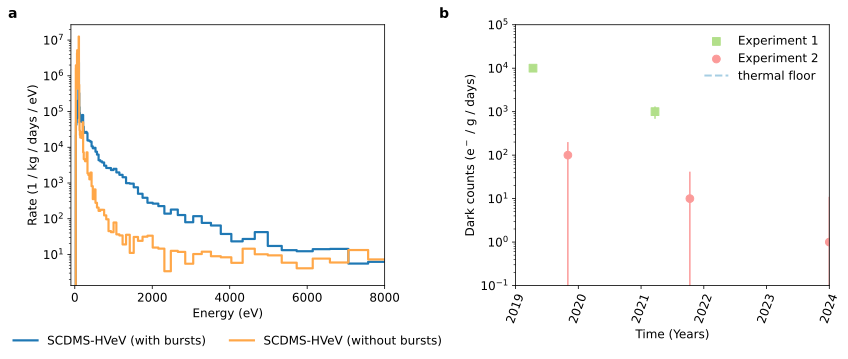

In [12]:
fig, ax = plt.subplots(1, 2, dpi=300, figsize=(12,5))

# ---------------------------------------------
# a: panel (a)
# ---------------------------------------------

# experiments

ax[0].step(data['bc'], data['SCDMS_100V_burst']['hist'], where='mid', 
            linewidth=2.2, label='SCDMS-HVeV (with bursts)', zorder=2, color=colors[1])

ax[0].step(data['bc'], data['SCDMS_100V_non-burst']['hist'], where='mid', 
            linewidth=2.2, label='SCDMS-HVeV (without bursts)', zorder=2, color=colors[2])


# specs
fig.text(0.02, 0.97, 'a', size=14, weight='bold')
ax[0].legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax[0].set_xscale('linear')
ax[0].set_yscale('log')
ax[0].set_xlim(-100, 8000)
#ax[0].set_ylim(1e-2, 1e7)
ax[0].set_ylabel('Rate (1 / kg / days / eV)')
ax[0].set_xlabel('Energy (eV)')





# ---------------------------------------------
# b: panel (b)
# ---------------------------------------------

# experiments

ax[1].scatter(data_e['exp1']['date'], data_e['exp1']['rate'],
              color=colors[3], s=60, marker='s', label='Experiment 1', )
ax[1].errorbar(data_e['exp1']['date'], data_e['exp1']['rate'], 
               yerr=data_e['exp1']['uncertainty'], #fmt="o", 
               color=colors[3],
              )

ax[1].scatter(data_e['exp2']['date'], data_e['exp2']['rate'],
              color=colors[3], s=60, marker='s')
ax[1].errorbar(data_e['exp2']['date'], data_e['exp2']['rate'], 
               yerr=data_e['exp2']['uncertainty'], #fmt="o",  
               color=colors[3],
              )

ax[1].scatter(data_e['exp3']['date'], data_e['exp3']['rate'],
              color=colors[5], s=60, label='Experiment 2')
ax[1].errorbar(data_e['exp3']['date'], data_e['exp3']['rate'], 
               yerr=data_e['exp3']['uncertainty'], #fmt="o", 
               color=colors[5],
              )

ax[1].scatter(data_e['exp4']['date'], data_e['exp4']['rate'],
              color=colors[5], s=60)
ax[1].errorbar(data_e['exp4']['date'], data_e['exp4']['rate'], 
               yerr=data_e['exp4']['uncertainty'], #fmt="o", 
               color=colors[5],
              )

ax[1].scatter(data_e['exp5']['date'], data_e['exp5']['rate'],
              color=colors[5], s=60)
ax[1].errorbar(data_e['exp5']['date'], data_e['exp5']['rate'], 
               yerr=data_e['exp5']['uncertainty'], #fmt="o", 
               color=colors[5],
              )

# thermal limits

ax[1].axhline(data_e['thermal'], color=colors[0], linewidth=2, linestyle='dashed',
              label='thermal floor')

# specs
fig.text(0.52, 0.97, 'b', size=14, weight='bold')
ax[1].legend(frameon=False, loc='upper right')
ax[1].set_xscale('linear')
ax[1].set_yscale('log')
ax[1].set_xlim(0, 600)
ax[1].set_ylim(1e-1, 1e5)
ax[1].set_ylabel('Dark counts (e$^-$ / g / days)')
ax[1].set_xlabel('Time (Years)')
ax[1].set_xticks([0, 360, 720, 1080, 1440, 1800],
                 labels=["2019", "2020", "2021", "2022", "2023", "2024"],
                 rotation=70)

# ---------------------------------------------
# globals 
# ---------------------------------------------


plt.tight_layout()
plt.savefig('plots/figX.png')
plt.show()